In [14]:

import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns

sns.set_theme(style='whitegrid')

fpath = os.path.abspath(r'C:\sandbox\glacier-attribution\data\gwi\gwi_main.csv')
data = pd.read_csv(fpath, skiprows=5)
data = data.dropna(how='all', axis=1)
data = data.iloc[1:]
data = data.apply(pd.to_numeric)
data = data.rename(columns={data.columns[-1]: 'predicted_warming'})
data = data.set_index('Date')

data.head(100)

,Anthrop forcing,Natural forcing,Ant T1,Ant T2,Nat T1,Nat T2,Ant warm,Nat warm,Obs warm,Best-fit ant,Best-fit nat,Best-fit tot,Obs warm.1,Residual,predicted_warming
Date,,,,,,,,,,,,,,,
1750.042,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,-0.0534,0.0955,0.0421,NaN,NaN,NaN
1750.125,-0.0017,-0.0008,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,-0.0534,0.0955,0.0421,NaN,NaN,NaN
1750.209,-0.0033,-0.0017,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,-0.0534,0.0955,0.0421,NaN,NaN,NaN
1750.292,-0.0050,-0.0025,-0.0001,0.0000,0.0000,0.0000,-0.0001,0.0000,NaN,-0.0535,0.0955,0.0420,NaN,NaN,NaN
1750.375,-0.0066,-0.0033,-0.0001,0.0000,-0.0001,0.0000,-0.0001,-0.0001,NaN,-0.0535,0.0955,0.0420,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757.959,-0.0289,-0.0500,-0.0089,-0.0003,-0.0474,-0.0016,-0.0092,-0.0490,NaN,-0.0624,0.0751,0.0127,NaN,NaN,NaN
1758.042,-0.0289,-0.0500,-0.0090,-0.0003,-0.0469,-0.0016,-0.0093,-0.0484,NaN,-0.0625,0.0754,0.0129,NaN,NaN,NaN
1758.125,-0.0295,-0.0528,-0.0090,-0.0003,-0.0463,-0.0016,-0.0093,-0.0479,NaN,-0.0625,0.0756,0.0131,NaN,NaN,NaN


C:\Users\drotto\AppData\Local\Temp\ipykernel_32932\2723341358.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\drotto\AppData\Local\Temp\ipykernel_32932\2723341358.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


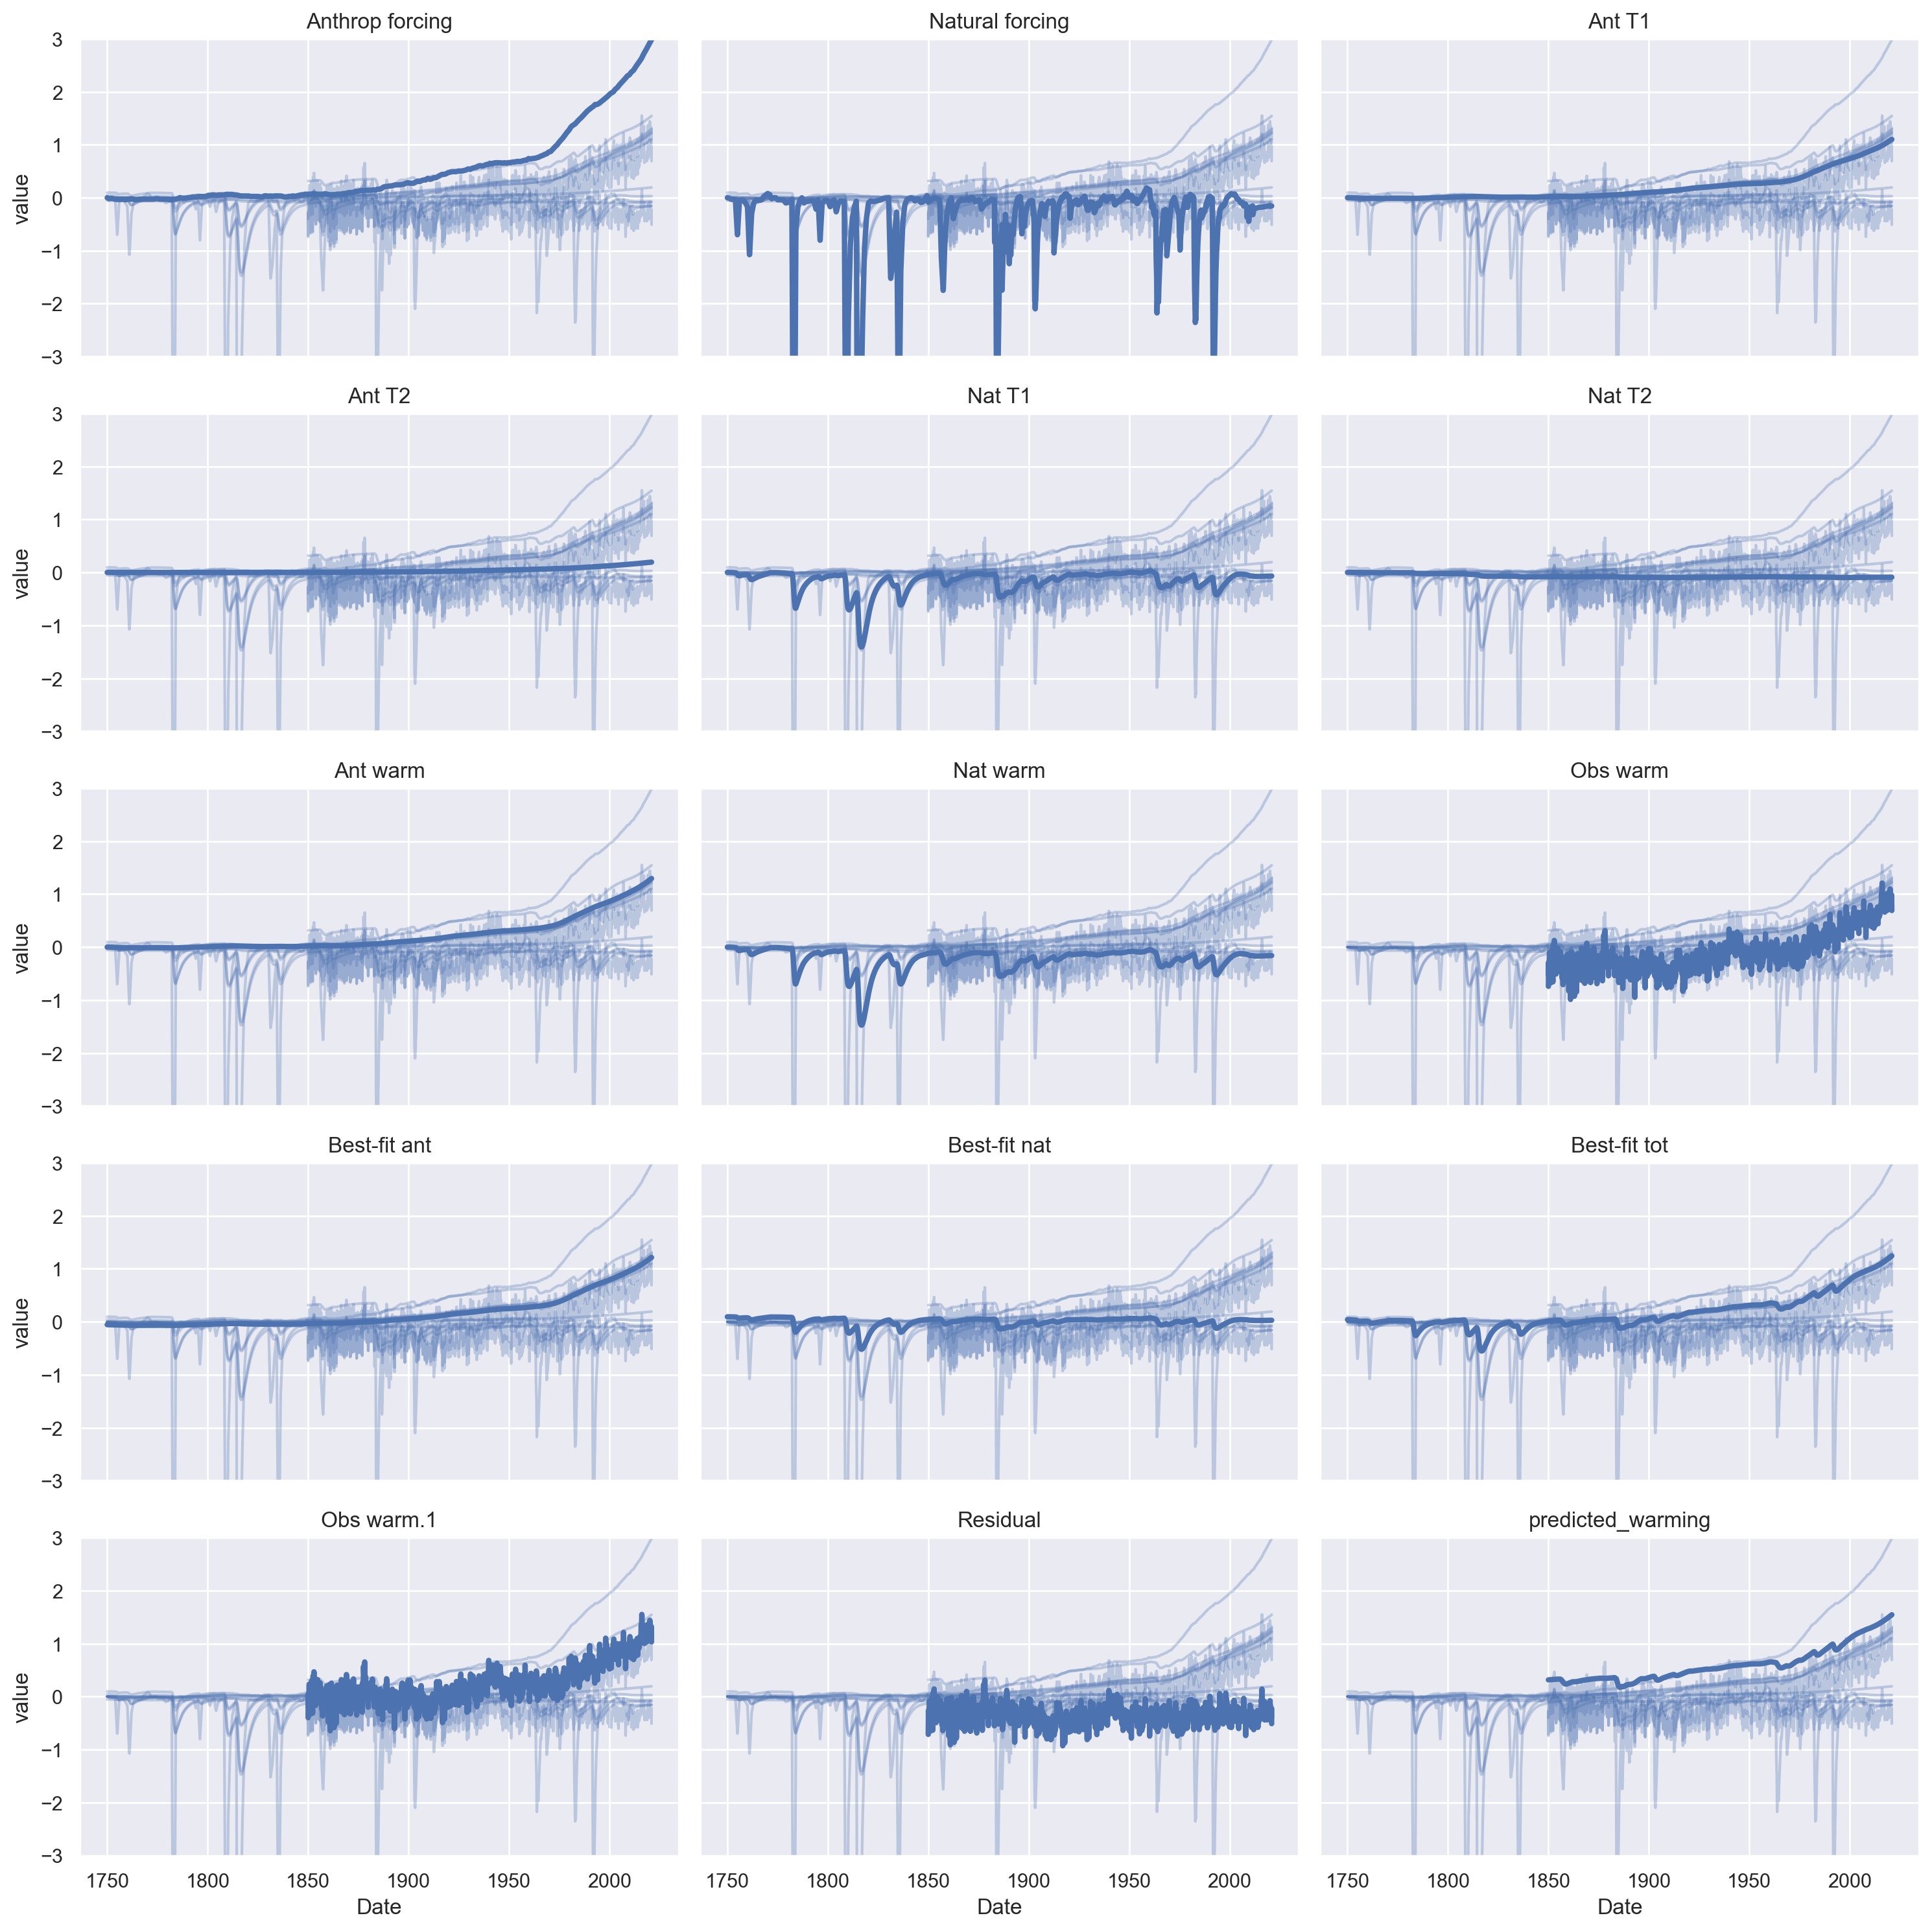

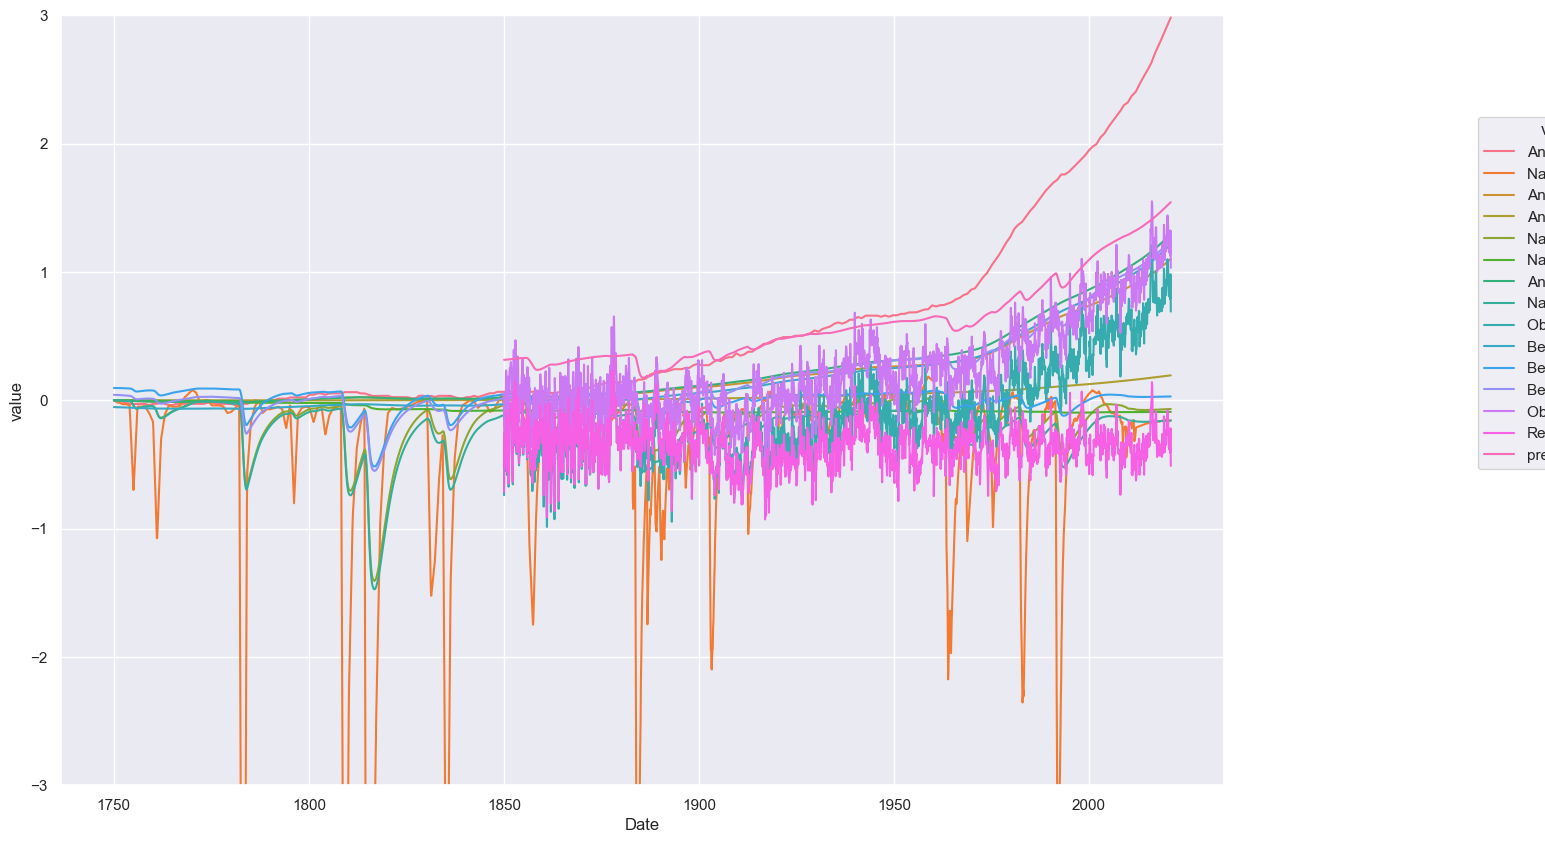

In [3]:
dp = data.copy()
dp = dp.reset_index()
dp = dp.melt(id_vars=['Date'])
f = plt.figure(figsize=(15, 15), dpi=200)
(
    so.Plot(dp, x='Date', y='value')
        .facet('variable', wrap=3)
        .add(so.Line(alpha=.3), group='variable', col=None)
        .add(so.Line(linewidth=3))
        .limit(y=(-3, 3))
        .on(f)
        .plot()
)
f.tight_layout()
f.show()

dp = data.copy()
dp = dp.reset_index()
dp = dp.melt(id_vars=['Date'])
f = plt.figure(figsize=(15, 10))
(
    so.Plot(dp, x='Date', y='value', color="variable")
        .add(so.Line())
        .limit(y=(-3, 3))
        .on(f)
        .plot()
)
#f.tight_layout()
f.show()

C:\Users\drotto\AppData\Local\Temp\ipykernel_32932\3282436968.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


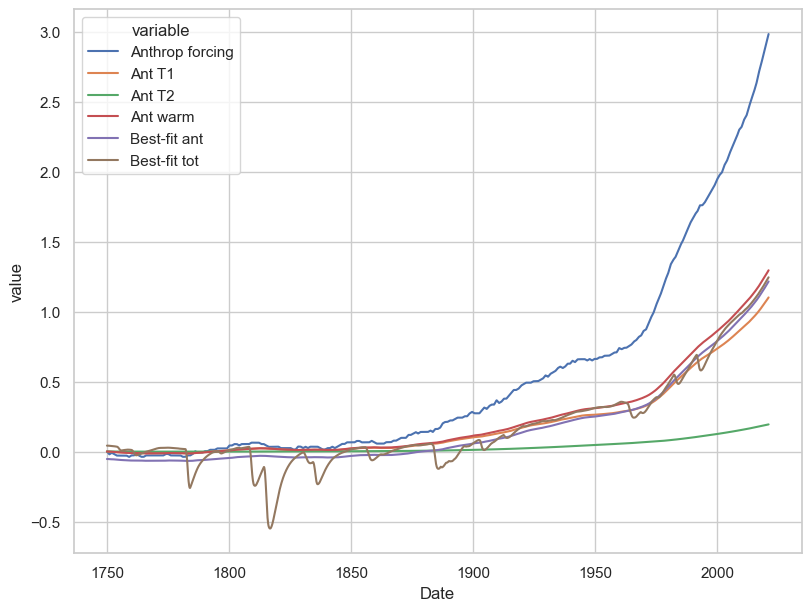

In [13]:
dp = data.copy()
non_obs_cols = [col for col in dp.columns if col not in ['Obs warm']]
dp = dp.loc[:, ['Anthrop forcing', 'Ant T1', 'Ant T2', 'Ant warm', 'Best-fit ant', 'Best-fit tot', 'Obs warm']]
dp = dp.reset_index()
dp = dp.melt(id_vars=['Date'])
f, ax = plt.subplots(1, 1, figsize=(8, 6), layout='constrained')

sns.lineplot(data=dp.loc[dp.variable.isin(non_obs_cols)], x='Date', y='value', hue='variable', ax=ax)
f.show()